<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/main/Demos/Ch4_CompositeIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Composite integration
In particular, composite **Newton Cotes** formulas

This builds off the [integration (non-composite) notebook](Ch4_integration.ipynb)

**Learning objectives**
- See that the composite formulas are easy to apply, and increasing $n$ is "no big deal" in terms of programming effort and roundoff error
- Check if our error bounds are useful

Copyright Department of Applied Mathematics, University of Colorado Boulder

Released under a BSD 3-clause license

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams.update({'font.size': 20})

Choose a function and domain

In [2]:
f = lambda x : np.cos(x)
F = lambda x : np.sin(x)  # dF/dx = f
a,b = -1,2

# Other examples to try
# f = lambda x : x**(3/2)
# F = lambda x : 2/5*x**(5/2)
# a,b = 0,1

# f = lambda x : 1/(1+x**2)  # aka Runge's function
# F = lambda x : np.arctan(x)
# a,b = -5,5

Integral I is 1.751


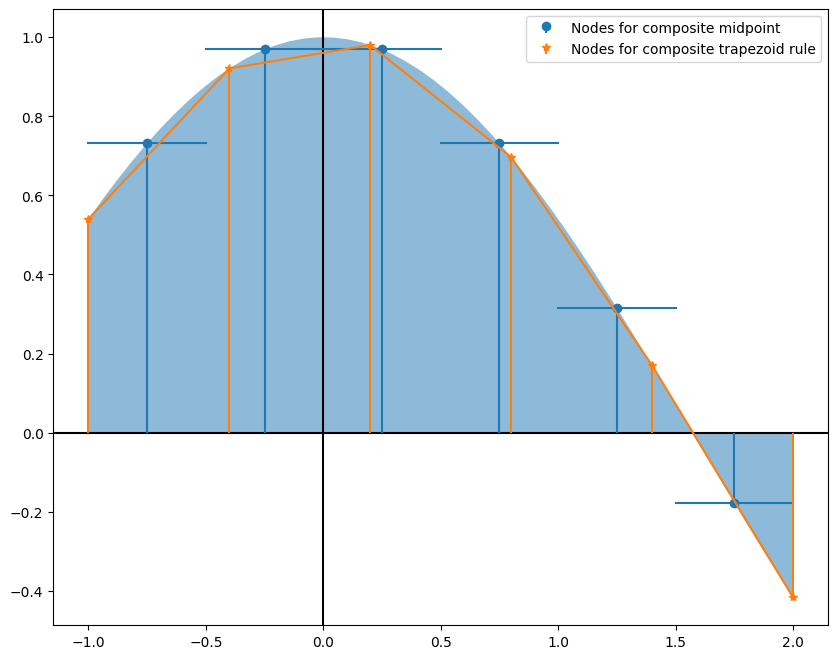

In [14]:
I   = F(b) - F(a)
print("Integral I is {:.3f}".format(I))

x = np.linspace(a,b)
plt.figure(figsize=(10,8))
plt.fill_between( x, f(x), alpha=0.5);
plt.axvline(color='k');
plt.axhline(color='k');

# Let's practice different types of nodes
n   = 5  # so n+1 = 6 nodes

# For composite midpoint, we have a + h/2, a + 3h/2, etc.
h   = (b-a)/(n+1)
nodesMidpoint = np.arange( a+h/2, b, step=h)
# plt.plot( nodesMidpoint, f(nodesMidpoint), 'o', markersize=12,label="Nodes for composite midpoint");
plt.stem( nodesMidpoint, f(nodesMidpoint), basefmt=' ', label="Nodes for composite midpoint" )
# and make a plot showing the approximation
for x in nodesMidpoint:
  plt.plot( [x-h/2,x+h/2], [f(x),f(x)], 'C0-')

# For composite trapezoidal rule, use closed nodes
nodesTrapezoidal, h = np.linspace(a,b,n+1,retstep=True) # don't forget the +1
# plt.plot( nodesTrapezoidal, f(nodesTrapezoidal), '*',markersize=12, label="Nodes for composite trapezoid rule");
plt.stem( nodesTrapezoidal, f(nodesTrapezoidal),linefmt='C1-',basefmt=' ',
         markerfmt='*', label="Nodes for composite trapezoid rule")
plt.plot( nodesTrapezoidal, f(nodesTrapezoidal),'C1-')
plt.legend()
plt.show()

In [16]:
def CompositeMidpoint( f, a, b, n ):
  h   = (b-a)/(n+1)  # this is \tilde{h} in the notes
  nodes = np.arange( a+h/2, b, step=h)  # n+1 nodes
  return h*np.sum(f(nodes))

def CompositeTrapezoidal( f, a, b, n):
  nodes, h = np.linspace(a,b,n+1,retstep=True)
  y  = f(nodes)
  return h*( np.sum(y) - (y[0]+y[-1])/2) # y[-1] is last element; in Matlab, this is y(end)

def CompositeSimpson( f, a, b, n):
  n = int(n/2)*2  # Make it even
  nodes, h = np.linspace(a,b,n+1,retstep=True)
  y = f(nodes)
  return h/3*( y[0] + 2*np.sum(y[2:n:2]) + 4*np.sum(y[1:n:2]) + y[-1] ) # in Matlab, it is a:step:b whereas in Python it is a:b:step and not inclusive of b

## And let's apply these rules to a nice problem
$$\int_{a=-1}^{b=2}\Big( f(x) = \cos(x) \Big) dx $$

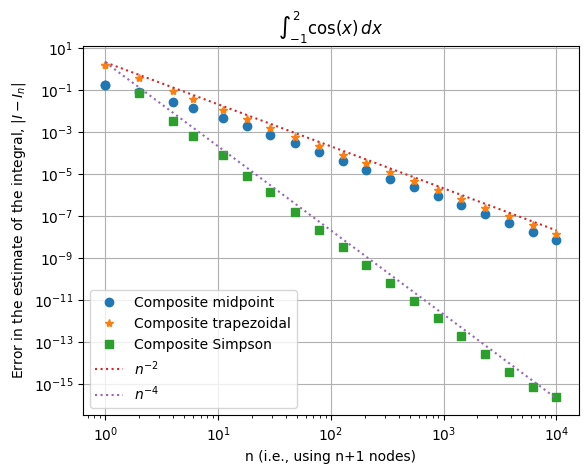

In [24]:
f = lambda x : np.cos(x)
F = lambda x : np.sin(x)  # dF/dx = f
a,b = -1,2
I   = F(b) - F(a)

nList = np.logspace(0,4,20).astype(int)
hList = (b-a)/nList
errMidpoint = []
errTrapezoidal = []
errSimpson = []
for n in nList:
  I_est = CompositeMidpoint( f, a, b, n)
  errMidpoint.append( abs(I_est - I))

  I_est = CompositeTrapezoidal( f, a, b, n)
  errTrapezoidal.append( abs(I_est-I))

  I_est = CompositeSimpson( f, a, b, n)
  errSimpson.append( abs(I_est-I))

plt.loglog( nList, errMidpoint,'o',label='Composite midpoint')
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal')
plt.loglog( nList, errSimpson,'s',label='Composite Simpson')
plt.loglog( nList, 2/nList**2,':',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
plt.loglog( nList, 2/nList**4,':',label='$n^{-4}$' )
plt.xlabel('n (i.e., using n+1 nodes)')
plt.ylabel('Error in the estimate of the integral, $|I-I_n|$')
plt.grid()
plt.legend()
plt.title(r'$\int_{-1}^{2} \cos(x)\,dx$');
plt.show()

## Try other problems
Try $$\int_{a=0}^{b}\Big( f(x) = \cos^2(x) \Big) dx = \frac14\sin(2x)+\frac12x\Big|_{a}^b$$
for both $b=3.14$ and $b=\pi$

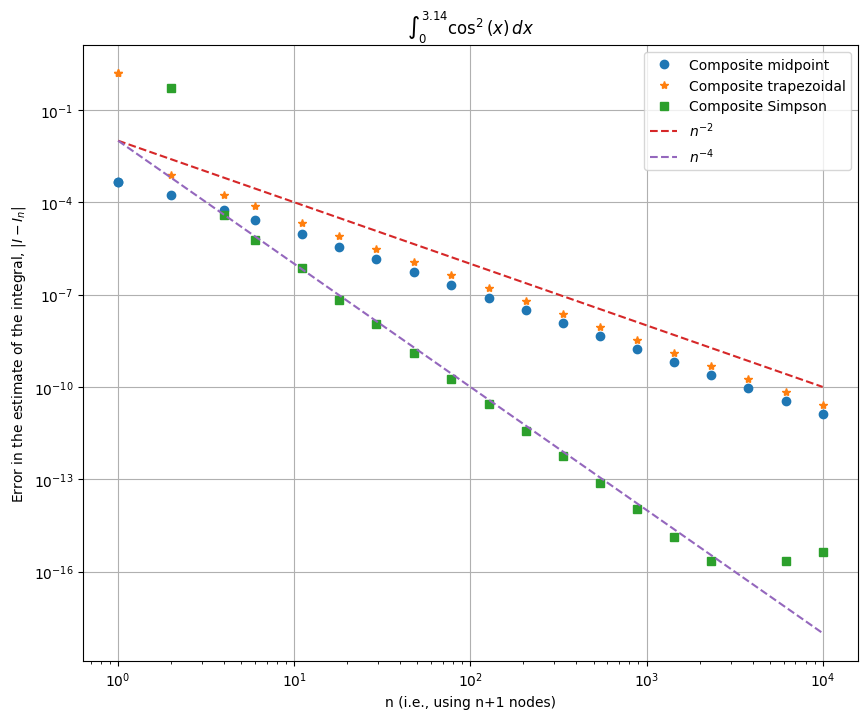

In [26]:
f = lambda x : np.cos(x)**2
F = lambda x : np.sin(2*x)/4 + x/2  # dF/dx = f
a,b = 0,3.14
I   = F(b) - F(a)

nList = np.logspace(0,4,20).astype(int)
hList = (b-a)/nList
errMidpoint = []
errTrapezoidal = []
errSimpson = []
for n in nList:
  I_est = CompositeMidpoint( f, a, b, n)
  errMidpoint.append( abs(I_est - I))

  I_est = CompositeTrapezoidal( f, a, b, n)
  errTrapezoidal.append( abs(I_est-I))

  I_est = CompositeSimpson( f, a, b, n)
  errSimpson.append( abs(I_est-I))

plt.figure(figsize=(10,8))
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint')
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal')
plt.loglog( nList, errSimpson,'s',label='Composite Simpson')
plt.loglog( nList, .01/nList**2,'--',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
plt.loglog( nList, .01/nList**4,'--',label='$n^{-4}$' )
plt.grid()
plt.legend()
plt.xlabel('n (i.e., using n+1 nodes)')
plt.ylabel('Error in the estimate of the integral, $|I-I_n|$')
plt.title(r'$\int_0^{3.14} \cos^2(x)\,dx$')
plt.show()

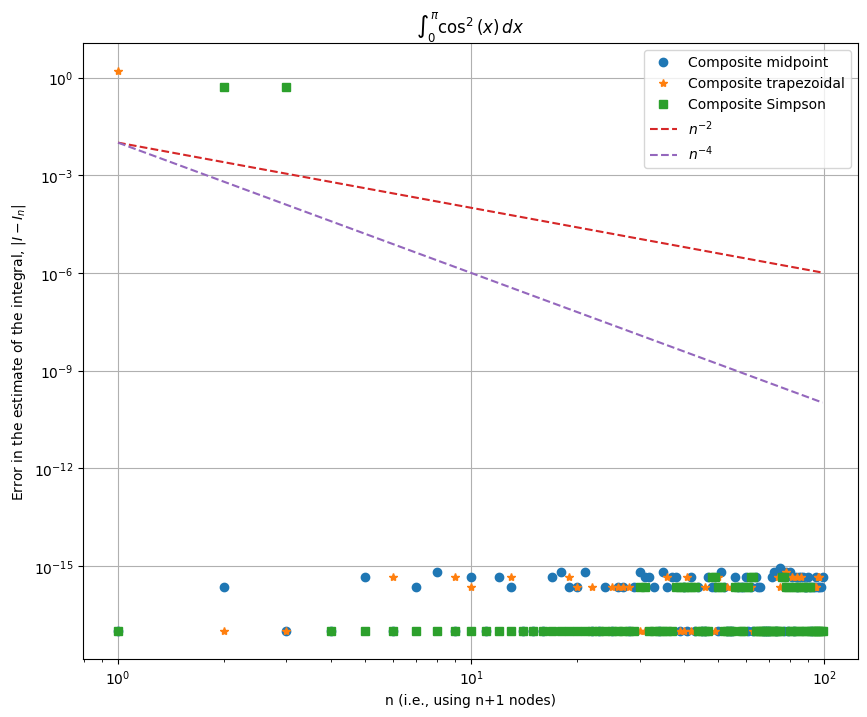

In [33]:
f = lambda x : np.cos(x)**2
F = lambda x : np.sin(2*x)/4 + x/2  # dF/dx = f
a,b = 0,np.pi  # Changing this
I   = F(b) - F(a)

# nList = np.logspace(0,4,20).astype(int)
nList = np.arange(1,100,dtype=int)
hList = (b-a)/nList
errMidpoint = []
errTrapezoidal = []
errSimpson = []
errFcn = lambda I_est : max(1e-17, abs(I_est - I) )
for n in nList:
  I_est = CompositeMidpoint( f, a, b, n)
  errMidpoint.append( errFcn(I_est))

  I_est = CompositeTrapezoidal( f, a, b, n)
  errTrapezoidal.append( errFcn(I_est))

  I_est = CompositeSimpson( f, a, b, n)
  errSimpson.append( errFcn(I_est))

plt.figure(figsize=(10,8))
plt.loglog( nList, errMidpoint,'o',label='Composite midpoint')
plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal')
plt.loglog( nList, errSimpson,'s',label='Composite Simpson')
plt.loglog( nList, .01/nList**2,'--',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
plt.loglog( nList, .01/nList**4,'--',label='$n^{-4}$' )
plt.grid()
plt.legend()
plt.title(r'$\int_0^{\pi} \cos^2(x)\,dx$');
plt.xlabel('n (i.e., using n+1 nodes)')
plt.ylabel('Error in the estimate of the integral, $|I-I_n|$')
plt.show()

### What's going on? Why is there such a big difference using $b=\pi$ rather than $b=3.14$?

When the function is periodic, we get spectral accuracy. Our simple composite formulas are equivalent to composite formulas of arbitrarily high order.  Also, there's no Runge phenomenon to worry about.  We couldn't improve accuracy by using non-equispaced nodes.

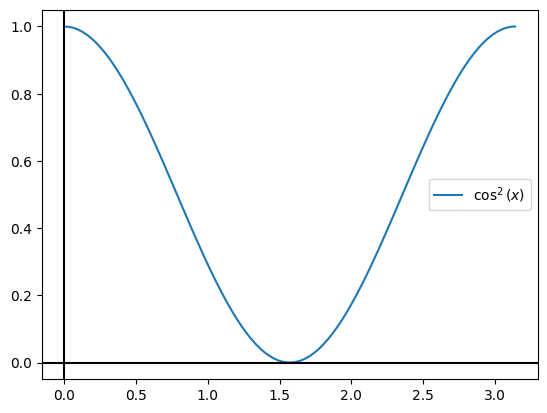

In [35]:
x   = np.linspace(a,np.pi,100)
plt.plot( x, f(x), '-', label=r"$\cos^2(x)$" )
plt.legend();
plt.axvline(color='k');
plt.axhline(color='k');

## What about other functions?
Try:
- $f(x) = x^{5/2}$. Is Simpson's rule still much better than the trapezoidal/composite rules?
- $f(x) = x^{3/2}$. Is Simpson's rule still much better than the trapezoidal/composite rules?
- $f(x) = |x|$. What's the convergence rate?
- $f(x) = 1/(1+x^2)$ (Runge's function). Is this as bad as it was for the non-composite rules?

In [50]:
Problems = []
Problems.append({'name':'$x^{5/2}$', 'f':lambda x : x**(5/2), 'F':lambda x :2/7*x**(7/2), 'a':0, 'b':1})
Problems.append({'name':'$x^{3/2}$', 'f':lambda x : x**(3/2), 'F':lambda x :2/5*x**(5/2), 'a':0, 'b':1})
Problems.append({'name':'$|x|$', 'f':lambda x : np.abs(x), 'F':lambda x :(-1)**( x<0)*x**2/2, 'a':-1, 'b':1})
Problems.append({'name':"Runge's function $1/(1+x^2)$", 'f':lambda x : 1/(1+x**2), 'F':lambda x :np.arctan(x), 'a':-5, 'b':5})

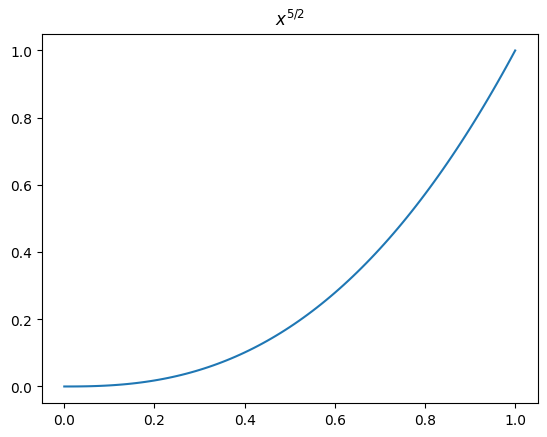

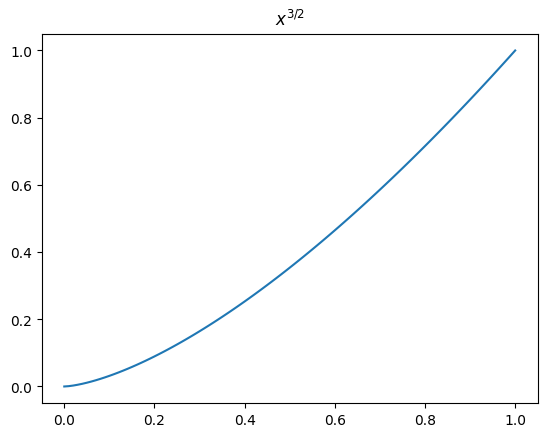

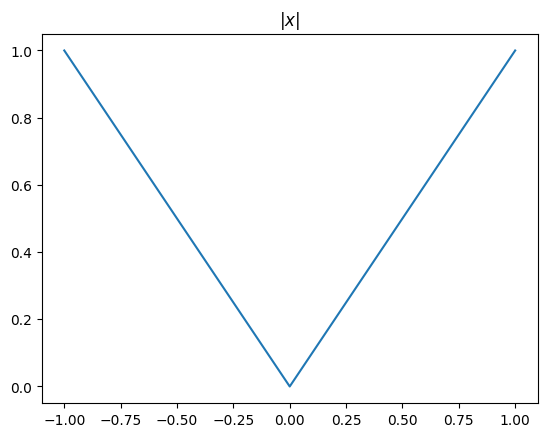

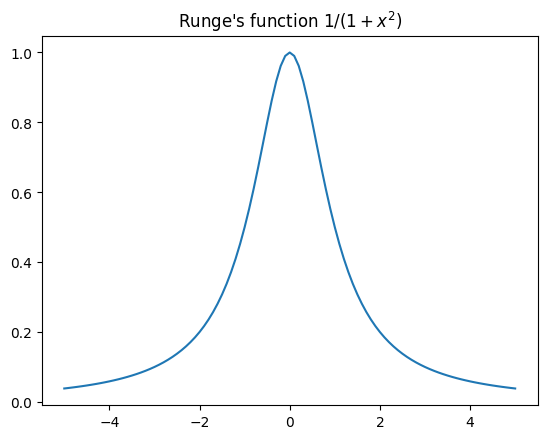

In [47]:
for prob in Problems:
    x = np.linspace( prob["a"], prob["b"],101)
    plt.plot( x, prob['f'](x), '-' )
    plt.title( prob['name'])
    plt.show()

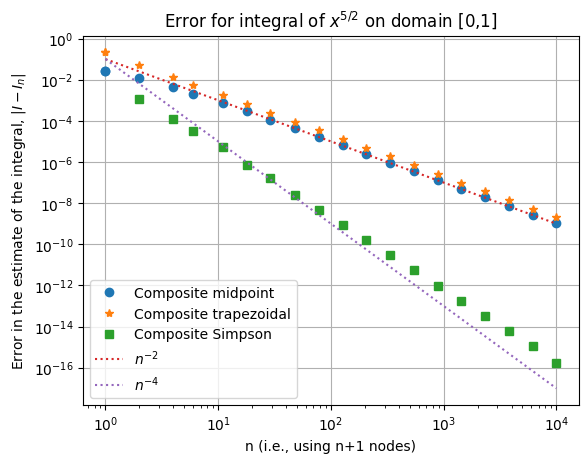

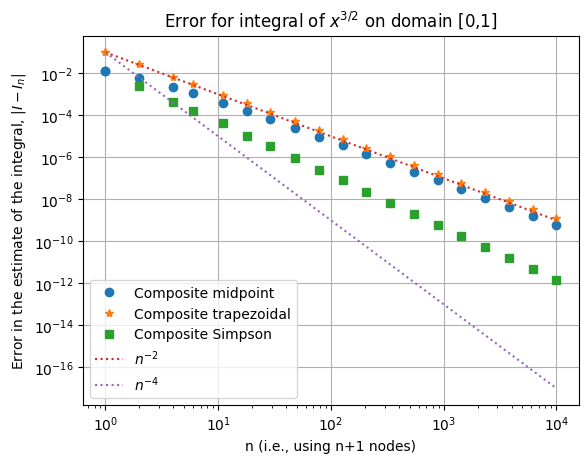

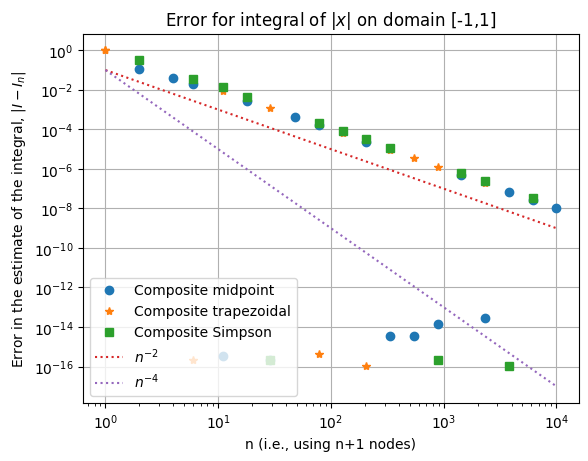

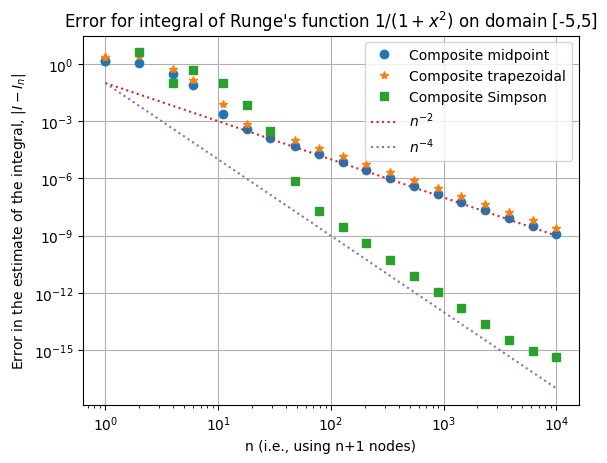

In [55]:
def plot_problem( prob ):
    a, b = prob["a"], prob["b"]
    f    = prob['f']
    F    = prob['F']
    name = prob['name']
    I    = F(b) - F(a) # true integral

    nList = np.logspace(0,4,20, dtype=int)
    hList = (b-a)/nList
    errMidpoint = []
    errTrapezoidal = []
    errSimpson = []
    for n in nList:
        I_est = CompositeMidpoint( f, a, b, n)
        errMidpoint.append( abs(I_est - I))

        I_est = CompositeTrapezoidal( f, a, b, n)
        errTrapezoidal.append( abs(I_est-I))

        I_est = CompositeSimpson( f, a, b, n)
        errSimpson.append( abs(I_est-I))

    # plt.figure(figsize=(10,8))
    plt.loglog( nList, errMidpoint,'o',   label='Composite midpoint');
    plt.loglog( nList, errTrapezoidal,'*',label='Composite trapezoidal')
    plt.loglog( nList, errSimpson,'s', label='Composite Simpson')
    plt.loglog( nList, .1/nList**2,':',label='$n^{-2}$' ) # the "2" is just so it doesn't overlap with the data
    plt.loglog( nList, .1/nList**4,':',label='$n^{-4}$' )
    plt.grid()
    plt.legend()
    plt.xlabel('n (i.e., using n+1 nodes)')
    plt.ylabel('Error in the estimate of the integral, $|I-I_n|$')
    plt.title("Error for integral of "+ name + f" on domain [{a},{b}]");
    plt.show()

for prob in Problems:
    plot_problem( prob )

We see a few phenomenon:
- For $x^{5/2}$, this looks as expected
- For $x^{3/2}$ midpoint and trapezoidal look as expected, but Simpson's doesn't
  - From our [notes](https://github.com/cu-applied-math/appm-4600-numerics/blob/main/Notes/Ch4_quadrature_composite.pdf), the error for composite Simpson's should be $O( |f''''(\xi)|/n^4 )$ (see also Thm. 4.4 in Burden and Faires). But if the fourth derivative of $f$ isn't small, then this bound isn't helpful.  Let's compute: if $f(x) = x^{3/2}$ then $f'(x) = \frac32 x^{1/2}$ and $f''(x) = \frac34 x^{-1/2}$ and $f'''(x) = -\frac38 x^{-3/2}$ and $f''''(x)=\frac{9}{16}x^{-5/2}$.  Our interval is $[0,1]$, so the issue is that $f''''(x)\to \infty$ as $x\to 0$.
  - We can check our hypothesis below by evaluating this integral on the domain $[0.1,1]$ (which excludes $0$) and see if that fixes it.  (It does!)
  - Wait a minute! Shouldn't we have seen this issue for $x^{5/2}$ as well, since its fourth derivative also blows up as $x\to 0$?  Well, we sort of did, but only when $n$ was very high, and at that point we were near the limits of floating point computation.  Below we "zoom in" to the region $[0,.1]$ and we can see the effect a little better.
- For $|x|$, things look *better than expected* sometimes. What's going on?
  - This function is piecewise linear, and all these methods have order of exactness at least 1, so they integrate linear functions exactly.  Depending on whether $n$ is odd or even, we have a node exactly at $0$. If we do, then each segment by itself is a linear function, and we have no error (at least up to machine epsilon)
- For the Runge function, it's a rough start, but asymptotically the error follows theory

Changing the domain to be $[.1,1]$ instead of $[0,1]$ fixes the slow convergence of Simpson's:

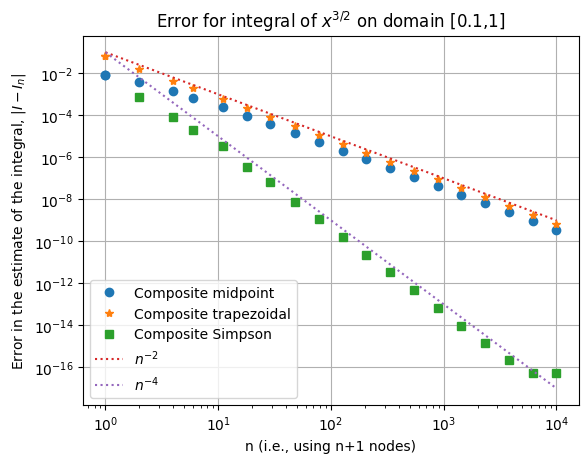

In [57]:
plot_problem( {'name':'$x^{3/2}$', 'f':lambda x : x**(3/2), 'F':lambda x :2/5*x**(5/2), 'a':.1, 'b':1} )

Conversely, zooming in to $[0,.1]$ instead of $[0,1]$ shows a slight effect even on $x^{5/2}$

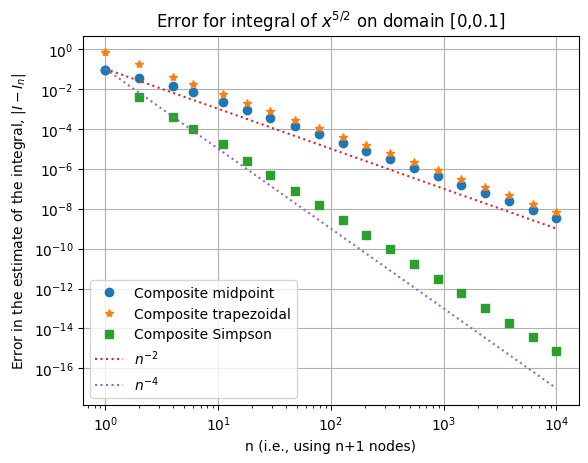

In [62]:
plot_problem( {'name':'$x^{5/2}$', 'f':lambda x : 10000*x**(5/2), 'F':lambda x :10000*2/7*x**(7/2), 'a':0, 'b':.1})